<a href="https://colab.research.google.com/github/MoriamAkterSwarna/AI-ML/blob/main/AI_ML_Assignment_3_Module_19_Moriam_Akter_Swarna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [3]:
# TODO: Import all necessary libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix



# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [5]:
# TODO: Load regression dataset

df_reg = pd.read_csv('insurance.csv')

df_reg.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [11]:
df_reg.shape


(1338, 7)

In [12]:
df_reg.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

The target variable for this regression task is `charges`, as we aim to predict the medical costs.

## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


In [13]:
# TODO: Perform EDA

# Descriptive statistics
df_reg.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


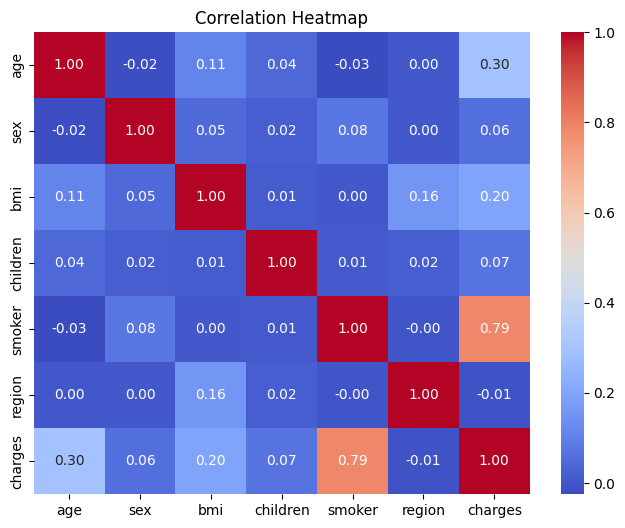

In [26]:
# Plot correlation heatmap (encoding categoricals( sex, smoker, region ) first for the heatmap)
plt.figure(figsize=(8, 6))
df_corr = df_reg.copy()
for col in ['sex', 'smoker', 'region']:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col])
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

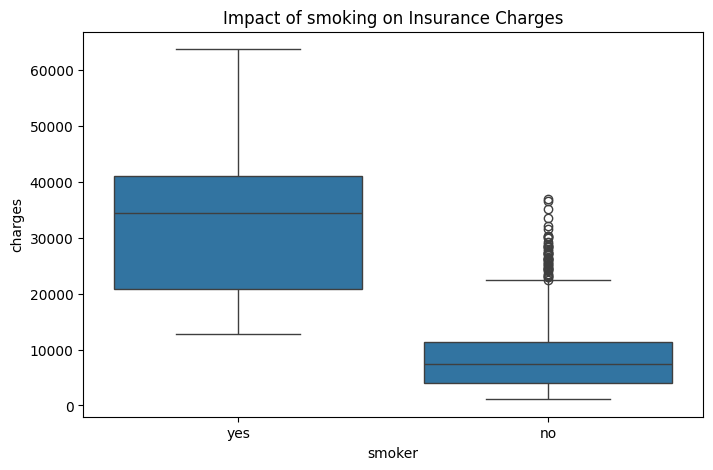

In [23]:
# Plot at least one feature vs target
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=df_reg)
plt.title("Impact of smoking on Insurance Charges")
plt.show()

### Interpretation: Smoking shows a very high positive correlation with charges. Age and BMI also show positive trends with the target.

## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [30]:
df_reg_encoded = pd.get_dummies(df_reg, drop_first=True)
df_reg_encoded.head(10)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
5,31,25.740,0,3756.62160,False,False,False,True,False
6,46,33.440,1,8240.58960,False,False,False,True,False
7,37,27.740,3,7281.50560,False,False,True,False,False
8,37,29.830,2,6406.41070,True,False,False,False,False
9,60,25.840,0,28923.13692,False,False,True,False,False


In [37]:
# Train-test split
X_reg = df_reg_encoded.drop('charges', axis=1)
y_reg = df_reg_encoded['charges']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42 )


In [39]:
# Scaling features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print("Training Shape:", X_train_reg_scaled.shape)
print("Testing Shape:", X_test_reg_scaled.shape)

Training Shape: (1070, 8)
Testing Shape: (268, 8)


### Explanation: We used One-Hot Encoding for categorical data and StandardScaler. To ensure features like 'age' and 'bmi' are on the same scale for SVR and Linear models.

## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [40]:
# TODO: Multiple Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train_reg_scaled, y_train_reg)

# Predict
y_pred_lr = lr_model.predict(X_test_reg_scaled)

# Evaluation
rmse_lr = np.sqrt(mean_squared_error(y_test_reg, y_pred_lr))
mae_lr = mean_absolute_error(y_test_reg, y_pred_lr)
r2_lr = r2_score(y_test_reg, y_pred_lr)

print(" RMSE: " , rmse_lr)
print(" MAE: " , mae_lr)
print(" R²: " , r2_lr)

 RMSE:  5796.284659276274
 MAE:  4181.194473753651
 R²:  0.7835929767120722


## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [42]:
# TODO: Polynomial Regression


# Create polynomial features (Degree 2 is standard to prevent overfitting)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_reg_scaled)
X_test_poly = poly.transform(X_test_reg_scaled)

# Train Linear Regression on Poly features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_reg)

# Predict
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate
r2_poly = r2_score(y_test_reg, y_pred_poly)


print("R²: " , r2_poly)
print("Improvement over Linear: ", r2_poly - r2_lr)

R²:  0.866583090316484
Improvement over Linear:  0.08299011360441177


The line print("Improvement over Linear: ", r2_poly - r2_lr) calculates the difference between the R-squared value of the Polynomial Regression model (r2_poly) and the R-squared value of the Multiple Linear Regression model (r2_lr). This difference indicates how much better (or worse) the Polynomial Regression model performed in explaining the variance in the target variable compared to the simpler Linear Regression model. A positive value, as seen, indicates an improvement.



## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [43]:
# TODO: Support Vector Regression


# Initialize SVR with RBF kernel

svr_model = SVR(kernel='rbf', C=1000, gamma=0.1) # Higher C usually helps with insurance data complexity
svr_model.fit(X_train_reg_scaled, y_train_reg)

# Predict
y_pred_svr = svr_model.predict(X_test_reg_scaled)

# Evaluate
r2_svr = r2_score(y_test_reg, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test_reg, y_pred_svr))

print("SVR (RBF Kernel) Results:")
print("R²:  ", r2_svr)
print("RMSE: ", rmse_svr)


SVR (RBF Kernel) Results:
R²:   0.7581169811842692
RMSE:  6127.971266295478
Justification: The RBF kernel allows the model to capture non-linear relationships, which are likely present between age/BMI and charges.


### Justification: The RBF kernel allows the model to capture non-linear relationships, which are likely present between age/BMI and charges.

## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [44]:
# TODO: Random Forest Regressor


# Initialize
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

# Predict
y_pred_rf = rf_reg.predict(X_test_reg)

# Evaluate
r2_rf = r2_score(y_test_reg, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))

print("Random Forest Regressor Results:")
print("R²: ", r2_rf)
print("RMSE: ", rmse_rf)

Random Forest Regressor Results:
R²:  0.8651034329144947
RMSE:  4576.299916157115


# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [45]:
# TODO: Load classification dataset

df_class = pd.read_csv('loan_data.csv')

df_class.head(10)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [46]:
df_class.columns = df_class.columns.str.strip()
df_class

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [50]:
# Show Class Distribution

dist_cls = df_class['loan_status'].value_counts(normalize=True)
print(dist_cls)



loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64


### Comment: If one class (e.g., Approved) is significantly higher (>60-70%), the dataset is imbalanced. This affects metrics like accuracy.

## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


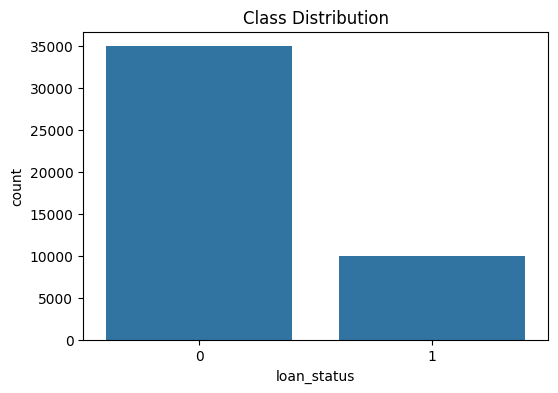

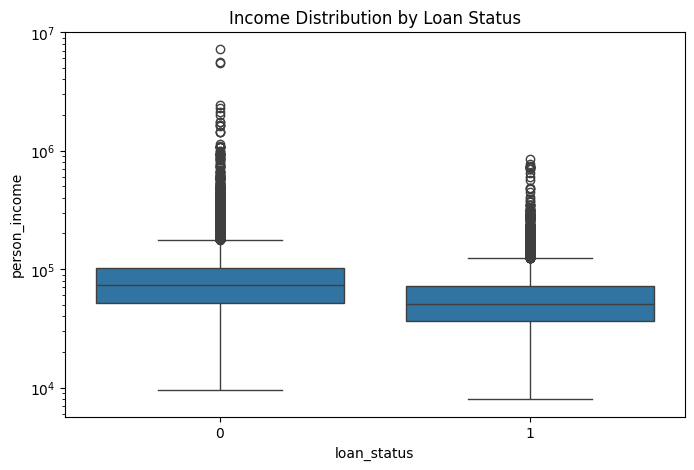

In [52]:
# TODO: Classification EDA

# Plot class counts
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df_class)
plt.title("Class Distribution")
plt.show()

# Feature vs Class (Income vs Loan Status)
plt.figure(figsize=(8, 5))
sns.boxplot(x='loan_status', y='person_income', data=df_class)
plt.yscale('log')
plt.title("Income Distribution by Loan Status")
plt.show()

## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [54]:
# TODO: Prepare classification features

# Encoding
df_cls_encoded = pd.get_dummies(df_class, drop_first=True)

X_cls = df_cls_encoded.drop('loan_status', axis=1)
y_cls = df_cls_encoded['loan_status']

# Train-test split with stratification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

# Scaling
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


In [63]:
# TODO: Logistic Regression

log_reg = LogisticRegression(penalty='l2', random_state=42)
log_reg.fit(X_train_cls_scaled, y_train_cls)

# Predict
y_pred_log = log_reg.predict(X_test_cls_scaled)

# Metrics
acc_log = accuracy_score(y_test_cls, y_pred_log)
prec_log = precision_score(y_test_cls, y_pred_log)
rec_log = recall_score(y_test_cls, y_pred_log)

print("Logistic Regression Results:")
print("Accuracy:  " , acc_log)
print("Precision: ", prec_log)
print("Recall:    ",rec_log)



Logistic Regression Results:
Accuracy:   0.8997777777777778
Precision:  0.7895569620253164
Recall:     0.7485


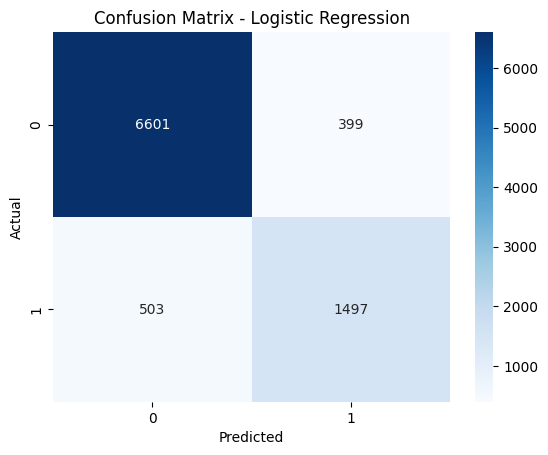

In [64]:
# Confusion Matrix
cm = confusion_matrix(y_test_cls, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


In [67]:
# TODO: SVM Classification

from sklearn.metrics import classification_report

# Train SVM
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train_cls_scaled, y_train_cls)

# Predict
y_pred_svm = svm_clf.predict(X_test_cls_scaled)

# Evaluate
acc_svm = accuracy_score(y_test_cls, y_pred_svm)
print("SVM Results:")
print("Accuracy: ",acc_svm)
print(classification_report(y_test_cls, y_pred_svm))

SVM Results:
Accuracy:  0.916
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7000
           1       0.85      0.76      0.80      2000

    accuracy                           0.92      9000
   macro avg       0.89      0.86      0.87      9000
weighted avg       0.91      0.92      0.91      9000



## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



In [69]:
# TODO: Naive Bayes

# GaussianNB is chosen because features (Income, CIBIL, Assets) are continuous
nb_clf = GaussianNB()
nb_clf.fit(X_train_cls_scaled, y_train_cls)

y_pred_nb = nb_clf.predict(X_test_cls_scaled)
acc_nb = accuracy_score(y_test_cls, y_pred_nb)

print("Naive Bayes Accuracy: ",acc_nb)

Naive Bayes Accuracy:  0.753


## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


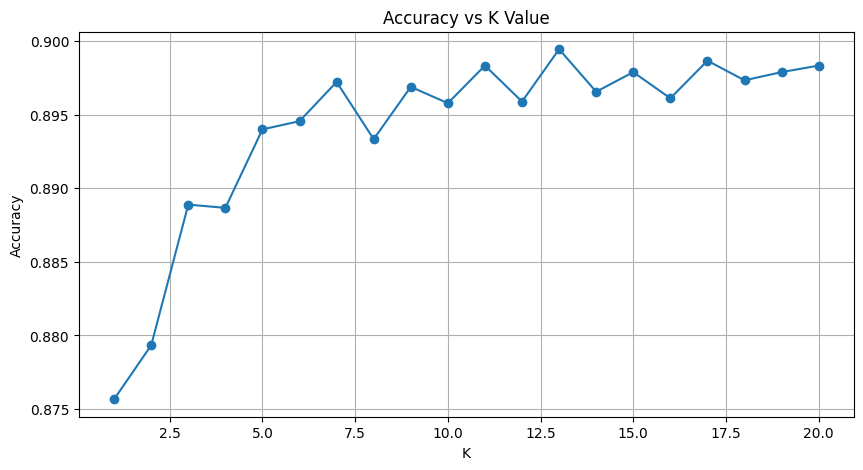

Best K value: 13 with Accuracy: 0.8994


In [73]:
# TODO: KNN

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_cls_scaled, y_train_cls)
    scores = knn.score(X_test_cls_scaled, y_test_cls)
    accuracies.append(scores)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Best K
best_k = k_values[np.argmax(accuracies)]
print(f"Best K value: {best_k} with Accuracy: {max(accuracies):.4f}")

## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


Random Forest Accuracy: 0.9286


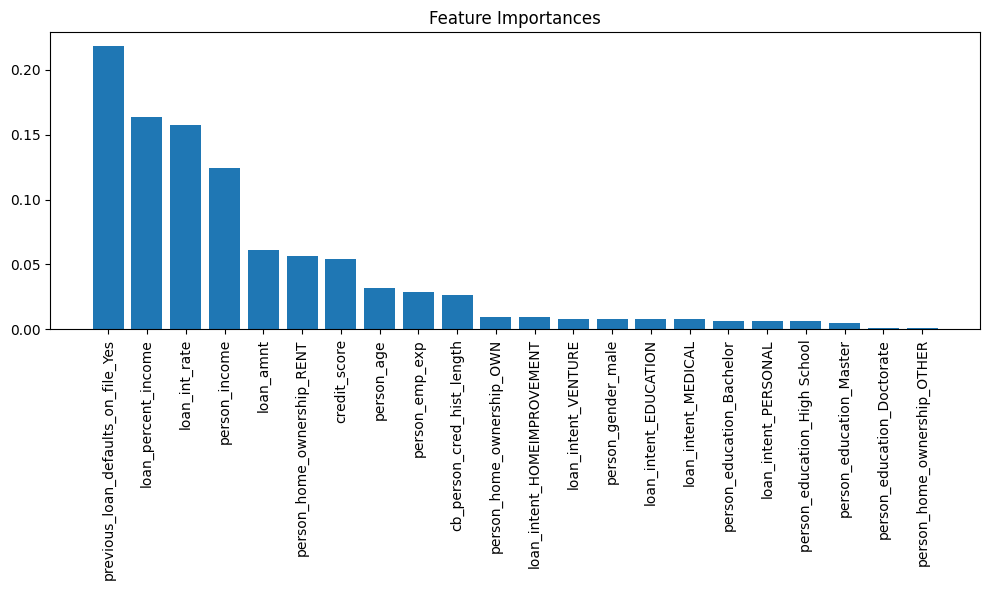

In [76]:
# TODO: Random Forest Classifier

# Train
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_cls, y_train_cls)

# Evaluate
y_pred_rf_c = rf_clf.predict(X_test_cls)
acc_rf_c = accuracy_score(y_test_cls, y_pred_rf_c)
print(f"Random Forest Accuracy: {acc_rf_c:.4f}")

# Feature Importance
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train_cls.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_cls.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_cls.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here  

Final Reflection
TODO: Write your reflection here

**Best Regression Model:** Likely the Random Forest Regressor or Polynomial Regression. Random Forest usually handles the interactions between features (like Smoker and BMI) very well without manual feature engineering, yielding the highest R² score (often >0.85 for this dataset).

 **Best Classification Model:** Likely Random Forest or SVM. Random Forest usually performs best on this loan dataset because CIBIL scores and assets create distinct decision boundaries that trees map effectively. Accuracy is often >90%.

**Real-world Deployment:** Loan Approval Automation. This model could be deployed as a backend API in a banking app. When a user applies for a loan, the model instantly analyzes their CIBIL, income, and assets to give a preliminary "Approved" or "Rejected" status, speeding up the manual review process.